In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [71]:
df = pd.read_csv('Data1\Data1\section 3\\italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

In [72]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [73]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [74]:
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [75]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


Text(0, 0.5, 'Magnitude')

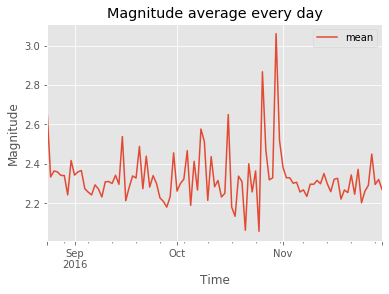

In [76]:
df["Magnitude"].resample("D").apply([np.mean]).plot()  #average over every day
plt.title("Magnitude average every day")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

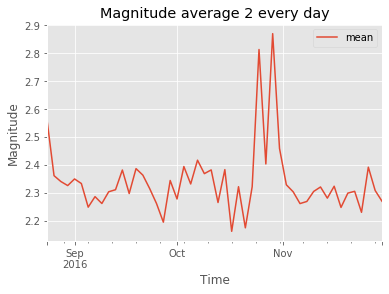

In [77]:
#every 2 days data
df["Magnitude"].resample("2D").apply([np.mean]).plot()  #average over every  2 day
plt.title("Magnitude average 2 every day")
plt.ylabel("Magnitude")

In [78]:
#Use rolling average
#Pandas series with magnitude greater than 3
magn3 = df.loc[df["Magnitude"] >= 3.0, "Magnitude"]

Text(0, 0.5, 'Magnitude')

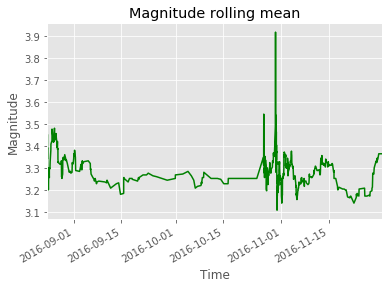

In [79]:
pd.Series.rolling(magn3, window=25).mean().plot(style="-g")
plt.title("Magnitude rolling mean")
plt.ylabel("Magnitude")

## Histogram -continuous numerical values

Text(0.5, 0, 'Depth/Km')

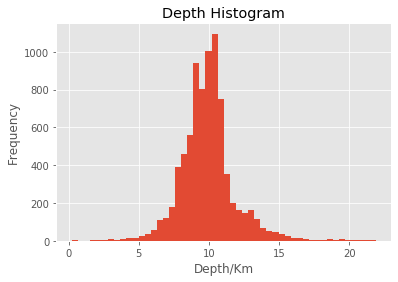

In [83]:
plt.figure()

#What is the probability of the an earthquake having depth less than 22km
depth = df[(df["Depth/Km"] < 22) & (df["Depth/Km"] >= 0)]["Depth/Km"]
depth.plot(kind="hist", stacked=True, bins=50)

plt.title("Depth Histogram")
plt.xlabel("Depth/Km")

In [86]:
#focus on magnitude greater than or equal 3
depth_magn = df.where((df["Magnitude"] >=3)).dropna()[["Magnitude", "Depth/Km"]]
dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585
5,3.348077,9.548077
6,3.282500,9.337500
7,3.157143,9.360714
8,3.570833,9.783333


Text(0.5, 1.0, 'Magnitude and depth during the day')

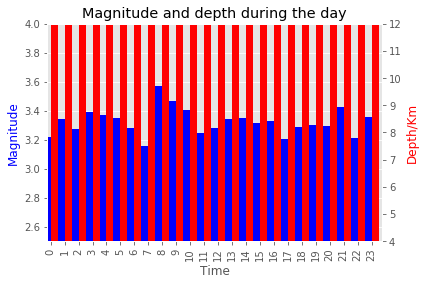

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hour of the day")
ax.yaxis.label.set_color("blue")

ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Depth/Km")
ax2.set_xlabel("Hour of the day")
ax2.yaxis.label.set_color("red")

width = 0.5

dm["Magnitude"].plot(kind="bar", color='blue', ax=ax, width=width, position=1)
dm["Depth/Km"].plot(kind="bar", color='red', ax=ax, width=width, position=0)

plt.grid(False)
plt.title("Magnitude and depth during the day")

## Plot multiple lines in same chat

In [23]:
stock = pd.read_csv("Data1\Data1\section 3\\all-stocks-2006-01-01-to-2018-01-01.csv", index_col='Date', parse_dates=['Date'])

In [24]:
stock.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [25]:
stock.Name.unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [26]:
app_stk = stock.query('Name=="AAPL"')
g_stk = stock.query('Name=="GOOGL"')
amz_stk = stock.query('Name=="AMZN"')

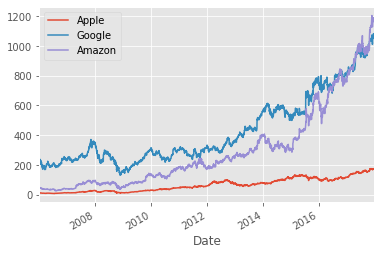

In [28]:
app_stk.Open.plot()
g_stk.Open.plot()
amz_stk.Open.plot()
plt.legend(['Apple','Google','Amazon'])
plt.show()

In [36]:
data = pd.read_csv('Data1\Data1\section 3\\avocado.csv', parse_dates=['Date'])

In [37]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [49]:
summr = data.groupby('Date')['Total Volume'].mean().reset_index()

In [39]:
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


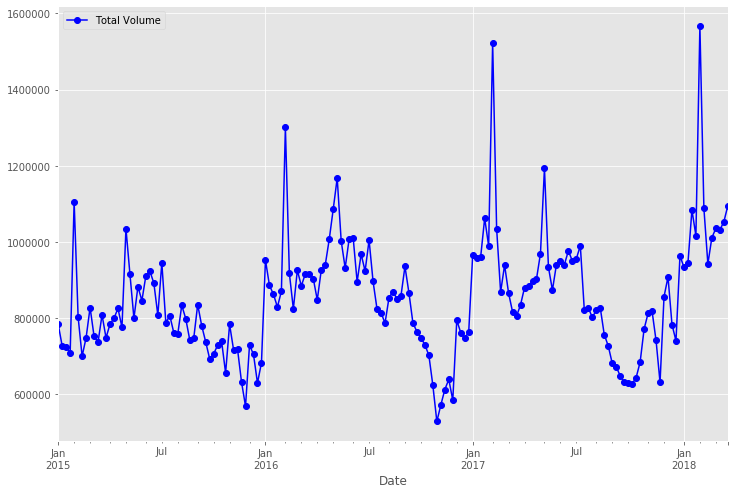

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
summr.set_index('Date').plot(ax=ax, marker="o", linestyle="-", color="blue")

Text(0.5, 0, 'Month')

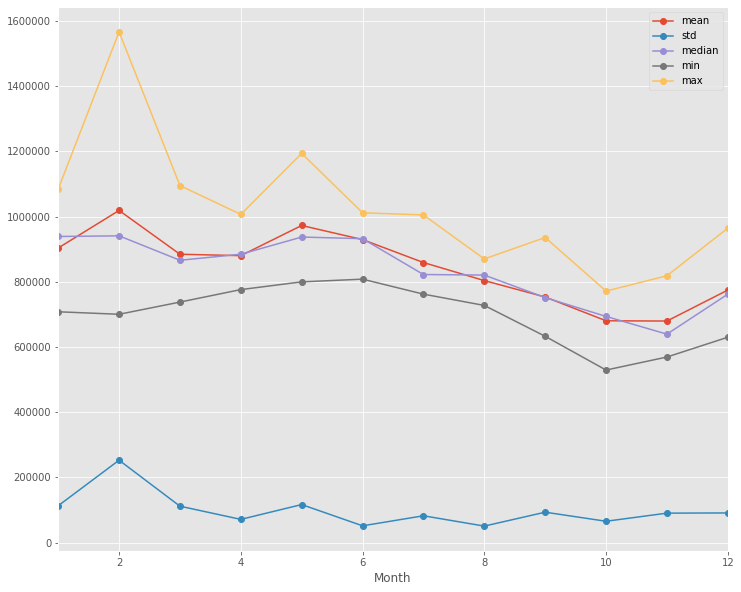

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
(summr.set_index('Date').assign(month=lambda df: df.index.month)
    .groupby('month')['Total Volume'].agg(["mean", "std", "median", "min", 'max'])
    .plot(ax=ax, marker="o"))
ax.set_xlabel('Month')

## Data munging for insights

In [52]:
df = pd.read_csv("Data1\Data1\section 3\\all-stocks-2006-01-01-to-2018-01-01.csv",  parse_dates=['Date'])

In [53]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [54]:
#frequency bi-weekly
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [55]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [56]:
year_end_dates = sample_dates[sample_dates.is_year_end]

In [57]:
#sorting done in descending by default
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head(5)

In [60]:
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [59]:
ws = worst_stocks.Name.values

In [61]:
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [62]:
tdf = df.copy()
tdf = df.set_index('Date')

Name
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

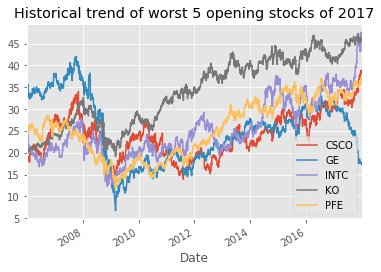

In [63]:
tdf[tdf.Name.isin(ws)].groupby('Name').Open.plot(title='Historical trend of worst 5 opening stocks of 2017', legend=True)

# identify best stock

In [65]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open', ascending=False).head(5)

In [66]:
bs = worst_stocks.Name.values

Name
AMZN     AxesSubplot(0.125,0.2;0.775x0.68)
BA       AxesSubplot(0.125,0.2;0.775x0.68)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.68)
GS       AxesSubplot(0.125,0.2;0.775x0.68)
MMM      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

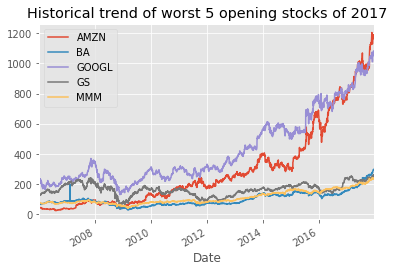

In [68]:
tdf[tdf.Name.isin(bs)].groupby('Name').Open.plot(title='Historical trend of worst 5 opening stocks of 2017', legend=True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>